In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
imgs="../Deep learning/devanagari-character-set/"
for i in os.listdir(imgs):
    print(i)


data.csv
Images


Segrigation


In [2]:
import pandas as pd

In [3]:
train = pd.read_csv(imgs+"data.csv")

In [4]:
train = pd.DataFrame(train)

In [5]:
print(train.isnull().sum())

pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
pixel_0004    0
             ..
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
character     0
Length: 1025, dtype: int64


In [6]:
train.dtypes

pixel_0000     int64
pixel_0001     int64
pixel_0002     int64
pixel_0003     int64
pixel_0004     int64
               ...  
pixel_1020     int64
pixel_1021     int64
pixel_1022     int64
pixel_1023     int64
character     object
Length: 1025, dtype: object

In [7]:
Column_name=train["character"].to_numpy()
del train ["character"]

In [8]:
Column_name

array(['character_01_ka', 'character_01_ka', 'character_01_ka', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [9]:
train.to_numpy(dtype='int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
train=np.array(train).astype('int')

In [11]:
train.shape

(92000, 1024)

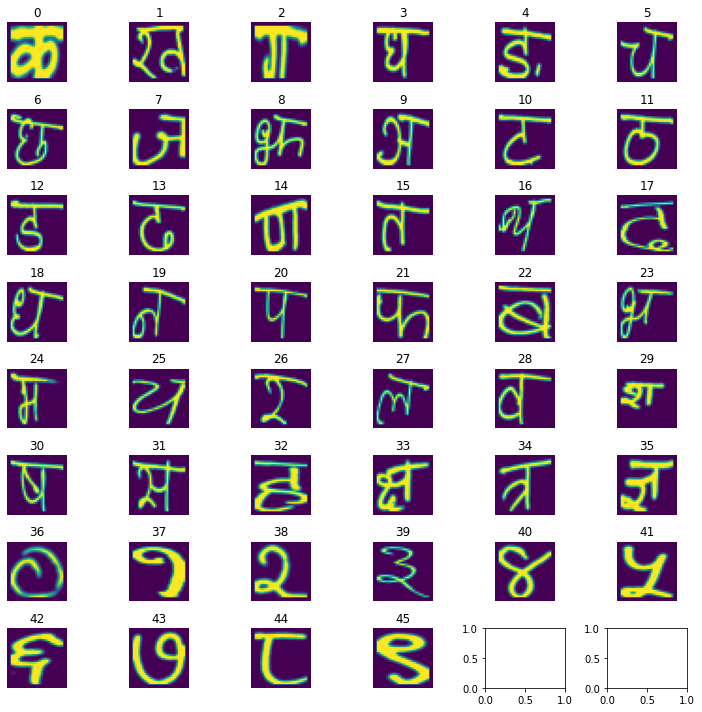

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
dict={}

count=0
#range(start,stop,step)
for i in range(0,92000,2000):
    imarray=np.array(train[i].reshape(32,32))
    dict.update({count:imarray}) 
    count=count+1
    if count >= 92000:
        break
       
figure, ax = plt.subplots(nrows=8,ncols=6,figsize=(10,10) )
for ind,title in enumerate(dict):
    ax.ravel()[ind].imshow(dict[title])
    ax.ravel()[ind].set_title(title)
    ax.ravel()[ind].set_axis_off()
plt.tight_layout()
plt.show()

In [13]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(Column_name)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['character_01_ka' 'character_01_ka' 'character_01_ka' ... 'digit_9'
 'digit_9' 'digit_9']
[ 0  0  0 ... 45 45 45]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['character_01_ka']


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train.astype("float32"),onehot_encoded, test_size=0.1, random_state=42)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((82800, 1024), (9200, 1024), (82800, 46), (9200, 46))

In [16]:
82800/50


1656.0

In [17]:
9200/50

184.0

In [18]:
X_train=(X_train.reshape(82800,32,32))/255
X_test=(X_test.reshape(9200,32,32))/255

In [19]:
X_train.shape

(82800, 32, 32)

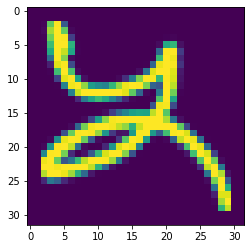

In [21]:
plt.imshow(X_train[44])

In [22]:
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,GlobalMaxPooling2D,Flatten,Dropout
from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from keras.layers import Input

In [23]:
model = Sequential(name="my_sequential")
model.add(Conv2D(50,(3,3),activation="relu",kernel_initializer='he_uniform', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu",kernel_initializer='he_uniform'))
model.add(Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11250)             0         
_________________________________________________________________
dropout (Dropout)            (None, 11250)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2880256   
_________________________________________________________________
dense_1 (Dense)              (None, 46)                11822     
Total params: 2,892,578
Trainable params: 2,892,578
Non-trainable params: 0
___________________________________________

In [25]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [26]:
history=model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=None,validation_data=(X_test,y_test))

Epoch 1/10
1656/1656 [==============================] - 65s 39ms/step - loss: 0.6007 - acc: 0.8286 - val_loss: 0.2333 - val_acc: 0.9322
Epoch 2/10
1656/1656 [==============================] - 62s 38ms/step - loss: 0.1949 - acc: 0.9402 - val_loss: 0.1641 - val_acc: 0.9530
Epoch 3/10
1656/1656 [==============================] - 60s 36ms/step - loss: 0.1333 - acc: 0.9578 - val_loss: 0.1333 - val_acc: 0.9610
Epoch 4/10
1656/1656 [==============================] - 61s 37ms/step - loss: 0.1015 - acc: 0.9672 - val_loss: 0.1335 - val_acc: 0.9623
Epoch 5/10
1656/1656 [==============================] - 62s 37ms/step - loss: 0.0827 - acc: 0.9723 - val_loss: 0.1341 - val_acc: 0.9638
Epoch 6/10
1656/1656 [==============================] - 61s 37ms/step - loss: 0.0697 - acc: 0.9766 - val_loss: 0.1205 - val_acc: 0.9679
Epoch 7/10
1656/1656 [==============================] - 71s 43ms/step - loss: 0.0583 - acc: 0.9804 - val_loss: 0.1418 - val_acc: 0.9626
Epoch 8/10
1656/1656 [==========================

In [27]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    #**kwargs
)

288/288 [==============================] - 3s 9ms/step - loss: 0.1201 - acc: 0.9712


[0.12014233320951462, 0.971195638179779]

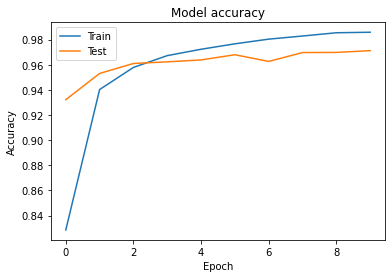

In [28]:
#Plot of Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

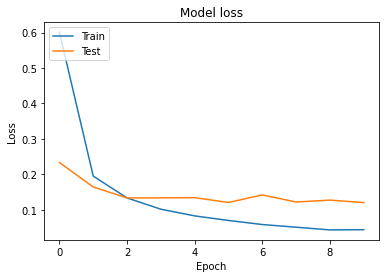

In [29]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()